         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  775.000000  775.000000  775.000000  775.000000  775.000000  775.000000   
mean     0.412903    2.246452    0.376774   29.581187    0.529032    0.420645   
std      0.492674    0.853574    0.484890   13.766359    0.990326    0.840565   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   21.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   36.000000    1.000000    1.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  775.000000  775.000000  
mean    34.878403    0.349677  
std     52.408474    0.614465  
min      0.000000    0.000000  
25%      8.050000    0.000000  
50%     15.900000    0.000000  
75%     34.197900    1.000000  
max    512.329

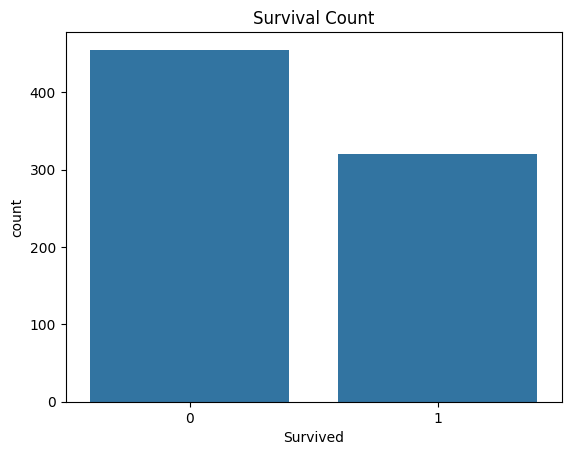

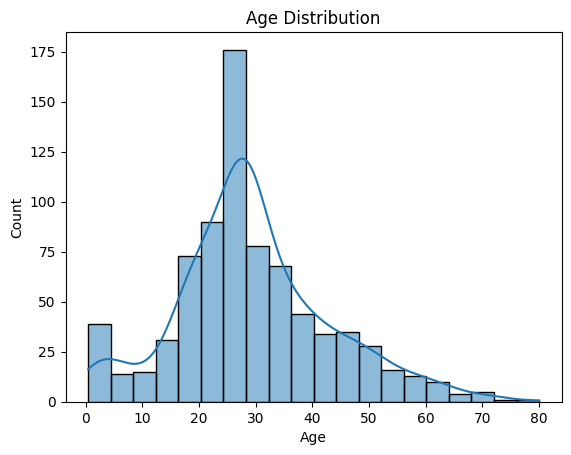

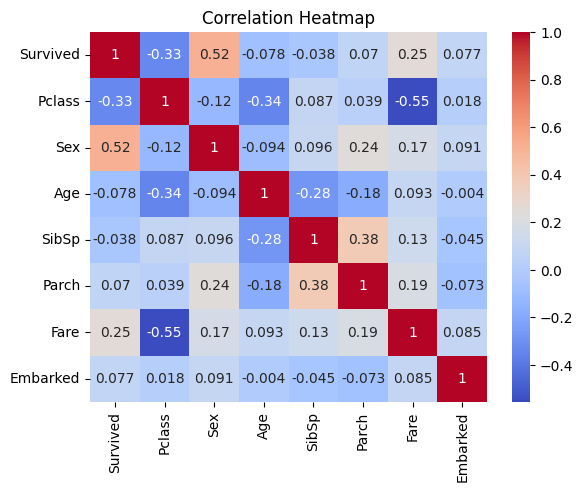

Accuracy: 0.7548387096774194
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        95
           1       0.68      0.68      0.68        60

    accuracy                           0.75       155
   macro avg       0.74      0.74      0.74       155
weighted avg       0.75      0.75      0.75       155

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [1]:
"""
AI/ML Assignment Solution - Titanic Survival Prediction Pipeline

This script implements a complete data science workflow from data cleaning to model deployment.
"""

# === Task 1: Data Cleaning ===
import pandas as pd

# Load Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Unnecessary Columns
df = df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

# Encode Categorical Variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Remove Duplicates and Save
cleaned_df = df.drop_duplicates()
cleaned_df.to_csv('cleaned_data.csv', index=False)

# === Task 2: EDA ===
import seaborn as sns
import matplotlib.pyplot as plt

# Summary Statistics
print(cleaned_df.describe())

# Plot 1: Survival Count
sns.countplot(x='Survived', data=cleaned_df)
plt.title('Survival Count')
plt.show()

# Plot 2: Age Distribution
sns.histplot(cleaned_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Plot 3: Heatmap
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# === Task 3: Machine Learning ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

X = cleaned_df.drop('Survived', axis=1)
y = cleaned_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save Model
joblib.dump(model, 'titanic_model.joblib')

# === Task 4: UI (Gradio) ===
import gradio as gr

model = joblib.load('titanic_model.joblib')

def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    sex = 0 if sex == 'Male' else 1
    embarked = {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}[embarked]
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]
    return "Survived" if prediction == 1 else "Did Not Survive"

gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Dropdown([1, 2, 3], label="Passenger Class"),
        gr.Radio(['Male', 'Female'], label="Sex"),
        gr.Slider(0, 100, value=30, label="Age"),
        gr.Slider(0, 8, value=0, label="Siblings/Spouses"),
        gr.Slider(0, 6, value=0, label="Parents/Children"),
        gr.Slider(0, 600, value=50, label="Fare"),
        gr.Dropdown(['Southampton', 'Cherbourg', 'Queenstown'], label="Embarked")
    ],
    outputs="text"
).launch()
